## 250801 Open Data

#### import

In [1]:
!pip install numpy 

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# !powershell pwd
!dir "../data/bms2/Training/training"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6A68-0B4D

 C:\git\data\bms2\Training\training 디렉터리

2025-08-01  오후 04:58    <DIR>          .
2025-08-01  오후 04:58    <DIR>          ..
2025-07-30  오후 10:51        23,057,847 d1_out_training.csv
2025-07-30  오후 10:51        17,666,329 d2_in_training.csv
2025-07-30  오후 10:51         6,267,068 d3_noise_training.csv
2025-07-30  오후 10:51         9,231,547 d4_other_training.csv
2025-07-30  오후 10:51        23,818,831 d5_normal_training.csv
               5개 파일          80,041,622 바이트
               2개 디렉터리  1,420,050,235,392 바이트 남음


In [4]:
dict_savename = {"d1_out_training" : "d1out_"}

d_name = "d1_out_training"
filename =  f"../data/bms2/Training/training/{d_name}.csv"

df = pd.read_csv(filename)

# 데이터 확인
print(df.head())        # 상위 5개 행
print(df.columns)       # 컬럼명 출력
print(df.shape)         # (행 수, 열 수)

           site                 sid     ldate  lrate  llevel leaktype  0HZ  \
0  S-4687025030  S-0359369085120315  20200708     90     256      out    0   
1  S-4677025028  S-0359369083968368  20190601     90     542      out    0   
2  S-4673025027  S-0359369085133797  20201028     90     705      out    0   
3  S-4772025022  S-0359369084117593  20200505     90     499      out    0   
4  S-4729010102  S-0359369084010178  20200520     90     423      out    0   

   10HZ  20HZ  30HZ  ...  MAX10  MAX11  MAX12  MAX13  MAX14  MAX15  MAX16  \
0    18    19    16  ...   4690    243   4710    284   4700    324   4670   
1     4     2     4  ...    310    423    300    711    270    412    270   
2     0     0     3  ...    240    751    240    897    240    741    240   
3     2     2     2  ...    370    549    360    427    370    800    370   
4     3     3     3  ...    400    521    400    395    400    461    400   

   MAX17  MAX18  MAX19  
0    230   4710    260  
1    531    290   

In [5]:
df_keys = df.keys()

In [6]:
len(df_keys)

539

In [7]:
for idx, d_10 in enumerate(df['10HZ']):
    if idx < 10:
        print(f"{idx} data {d_10}")

0 data 18
1 data 4
2 data 0
3 data 2
4 data 3
5 data 5
6 data 17
7 data 3
8 data 6
9 data 6


### 분석 알고리즘
- 

In [8]:
len(df_keys)//6

89

In [9]:
# Keys 확인
n_temp = len(df_keys)//6
for i in range(n_temp):
    print(f"{df_keys[i*6]}\t{df_keys[i*6+1]}\t{df_keys[i*6+2]}\t{df_keys[i*6+3]}\t{df_keys[i*6+4]}\t{df_keys[i*6+5]}")
print(f"{df_keys[n_temp*6]}\t{df_keys[n_temp*6+1]}\t{df_keys[n_temp*6+2]}\t{df_keys[n_temp*6+3]}\t{df_keys[n_temp*6+4]}\t")

site	sid	ldate	lrate	llevel	leaktype
0HZ	10HZ	20HZ	30HZ	40HZ	50HZ
60HZ	70HZ	80HZ	90HZ	100HZ	110HZ
120HZ	130HZ	140HZ	150HZ	160HZ	170HZ
180HZ	190HZ	200HZ	210HZ	220HZ	230HZ
240HZ	250HZ	260HZ	270HZ	280HZ	290HZ
300HZ	310HZ	320HZ	330HZ	340HZ	350HZ
360HZ	370HZ	380HZ	390HZ	400HZ	410HZ
420HZ	430HZ	440HZ	450HZ	460HZ	470HZ
480HZ	490HZ	500HZ	510HZ	520HZ	530HZ
540HZ	550HZ	560HZ	570HZ	580HZ	590HZ
600HZ	610HZ	620HZ	630HZ	640HZ	650HZ
660HZ	670HZ	680HZ	690HZ	700HZ	710HZ
720HZ	730HZ	740HZ	750HZ	760HZ	770HZ
780HZ	790HZ	800HZ	810HZ	820HZ	830HZ
840HZ	850HZ	860HZ	870HZ	880HZ	890HZ
900HZ	910HZ	920HZ	930HZ	940HZ	950HZ
960HZ	970HZ	980HZ	990HZ	1000HZ	1010HZ
1020HZ	1030HZ	1040HZ	1050HZ	1060HZ	1070HZ
1080HZ	1090HZ	1100HZ	1110HZ	1120HZ	1130HZ
1140HZ	1150HZ	1160HZ	1170HZ	1180HZ	1190HZ
1200HZ	1210HZ	1220HZ	1230HZ	1240HZ	1250HZ
1260HZ	1270HZ	1280HZ	1290HZ	1300HZ	1310HZ
1320HZ	1330HZ	1340HZ	1350HZ	1360HZ	1370HZ
1380HZ	1390HZ	1400HZ	1410HZ	1420HZ	1430HZ
1440HZ	1450HZ	1460HZ	1470HZ	1480HZ	1490HZ
1500HZ	1510HZ	1520HZ	153

In [10]:
keys_hz = []
for k in df_keys:
    if "HZ" in k:
        keys_hz.append(k)

# 17539
print(len(df['10HZ']))

# # 1. 값을 넣기위해서 array 정의
# rows, cols = len(df['10HZ']), len(keys_hz)
# arr_d = [[0 for _ in range(cols)] for _ in range(rows)]

# for ti in range(len(df['10HZ'])):
#     for idx, k in enumerate(keys_hz):
#         arr_d[ti][idx] = df[k][ti]

# 2. 데이터를 Numpy array에 담아서 확인
rows, cols = len(df['10HZ']), len(keys_hz)
arr_d = np.zeros((rows, cols), dtype=np.float64)

for i in range(len(df['10HZ'])):
    for j, k in enumerate(keys_hz):
        arr_d[i, j] = df[k][i]

print(arr_d.shape)

17539
(17539, 513)


KeyError: 'graph/d1_out_training'

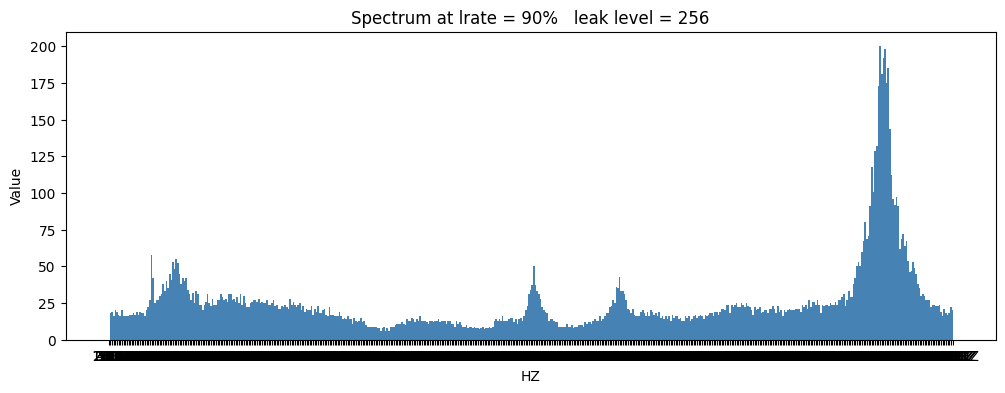

In [11]:
# bar 형 그래프 확인 후 저장
n = 10 # len(df['10HZ'])

for i in range(n):
    if (i+1)%10 ==0:
        print(f"{(i+1//10)*10} saving")
    
    plt.figure(figsize=(12, 4))
    plt.bar(keys_hz,arr_d[i], width=1.0, color="steelblue")
    plt.title(f"Spectrum at lrate = {df["lrate"][i]}%   leak level = {df["llevel"][i]}")
    plt.xlabel("HZ")
    plt.ylabel("Value")

    
    filename = f"{dict_savename["graph/d1_out_training"]}_{i}.png"
    plt.savefig(filename, dpi=150, bbox_inches="tight")
    plt.close()
    
    


In [ ]:
dict_savename = {"d5_normal_training":"d5normal_"}
# "d1_out_training" : "d1out_", "d2_in_training" : "d2in_", "d3_noise_training" : "d3nose_", "d4_other_training" : "d4other_", 
samplename =  f"../data/bms2/Training/training/d5_normal_training.csv"
df_sample = pd.read_csv(samplename)
df_keys = df_sample.keys()


keys_hz = []
for k in df_keys:
    if "HZ" in k:
        keys_hz.append(k)


for d_name in dict_savename.keys():
    print(d_name)
    print(dict_savename[d_name])
    
    filename =  f"../data/bms2/Training/training/{d_name}.csv"

    df = pd.read_csv(filename)

    # 데이터 확인
    # print(df.head())        # 상위 5개 행
    # print(df.columns)       # 컬럼명 출력
    print(df.shape)         # (행 수, 열 수)

    # bar 형 그래프 확인 후 저장
    n = len(df['10HZ'])

    # 2. 데이터를 Numpy array에 담아서 확인
    rows, cols = len(df['10HZ']), len(keys_hz)
    arr_d = np.zeros((rows, cols), dtype=np.float64)
    
    for i in range(len(df['10HZ'])):
        for j, k in enumerate(keys_hz):
            arr_d[i, j] = df[k][i]

   
    
    for i in range(n):
        path = dict_savename[d_name]
        if not os.path.exists(path):
            print(f"{path} 가 없어서 새로 만듭니다.")
            os.makedirs(path)    
        filename = f"{path}/{dict_savename[d_name]}_{i}.png"
        
        if os.path.exists(filename):
            continue
        
        if (i+1)%10 ==0:
            print(f"{(i+1//10)*10} saving")
        
        plt.figure(figsize=(12, 4))
        plt.bar(keys_hz,arr_d[i], width=1.0, color="steelblue")
        plt.title(f"Spectrum at lrate = {df["lrate"][i]}%   leak level = {df["llevel"][i]}")
        plt.xlabel("HZ")
        plt.ylabel("Value")
            
        plt.savefig(filename, dpi=150, bbox_inches="tight")
        plt.close()
    
    


In [ ]:
1+1